# Loan Approval Risk Prediction Using Machine Learning

## 1. Business Problem

Financial institutions must determine whether loan applicants should be approved or declined while minimising default risk.

This project builds predictive classification models to identify high-risk applicants using historical loan data.


## 2. Dataset Overview

The dataset contains approximately 58,600 loan applications with financial and demographic attributes such as income, employment length, loan amount, interest rate, and credit history.

The target variable is `loan_approval_status`, indicating whether a loan was approved or declined.

Initial analysis shows the dataset is imbalanced, with approved loans significantly outnumbering declined loans.


In [61]:
# Clone the GitHub repository into Colab
!git clone https://github.com/KieranRossetti/Loan-Approval-Risk.git

# Move into the project directory
%cd Loan-Approval-Risk

Cloning into 'Loan-Approval-Risk'...
remote: Enumerating objects: 37, done.
remote: Counting objects: 100% (37/37), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 37 (delta 9), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (37/37), 1.84 MiB | 4.21 MiB/s, done.
Resolving deltas: 100% (9/9), done.
/content/Loan-Approval-Risk/Loan-Approval-Risk/Loan-Approval-Risk


In [62]:
# Standard core libraries
import pandas as pd
import numpy as np

# Model Selection and preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV

# Visualisation
from matplotlib import pyplot as plt

# Models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay

In [63]:
from pathlib import Path
DATA_PATH = Path("data/raw/loan_approval_data.csv")
df = pd.read_csv(DATA_PATH)

df.describe(include="all").transpose()

/tmp/ipython-input-666353276.py:3: DtypeWarning: Columns (1,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(DATA_PATH)


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,58645.0,NaN,NaN,NaN,29322.0,16929.497605,0.0,14661.0,29322.0,43983.0,58644.0
age,58639.0,104.0,22.0,5903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.0,NaN,NaN,NaN,64046.172871,37931.106978,4200.0,42000.0,58000.0,75600.0,1900000.0
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.0,NaN,NaN,NaN,4.703487,4.004982,0.0,2.0,4.0,7.0,150.0
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.0,NaN,NaN,NaN,9217.556518,5563.807384,500.0,5000.0,8000.0,12000.0,35000.0
loan_interest_rate,58634.0,NaN,NaN,NaN,10.685988,3.161955,-11.14,7.88,10.75,12.99,150.0


In [64]:
#Check number of features and instances
df.shape

(58645, 16)

In [65]:
# Check dataset structure
df.head(10)

,id,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,max_allowed_loan,Credit_Application_Acceptance
0,35437,21.0,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved,-2426900,0.0
1,53756,21.0,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved,-111739,0.0
2,42205,23.0,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved,-89000,0.0
3,19180,40.0,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved,35000,0.0
4,28072,40.0,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved,35000,0.0
5,32074,40.0,M,Unknown,131004,MORTGAGE,9,VENTURE,30000,7.90,0.23,N,13,Approved,30000,0.0
6,7224,40.0,M,Unknown,150000,MORTGAGE,9,DEBTCONSOLIDATION,25000,11.89,0.17,N,11,Approved,25000,0.0
7,14471,40.0,M,Unknown,132000,MORTGAGE,3,HOMEIMPROVEMENT,25000,16.82,0.22,N,17,Approved,25000,0.0
8,20163,40.0,M,Unknown,80000,MORTGAGE,2,DEBTCONSOLIDATION,25000,10.25,0.31,N,11,Approved,25000,0.0
9,20384,40.0,M,Unknown,80000,MORTGAGE,9,VENTURE,25000,18.67,0.30,N,17,Approved,25000,0.0


In [66]:
#Dropping the features we don't want
df.drop(['id', 'max_allowed_loan', 'Credit_Application_Acceptance'], axis=1, inplace=True)

In [67]:
#Display the new dataframe
df.head()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
0,21.0,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved
1,21.0,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved
2,23.0,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved
3,40.0,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved
4,40.0,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved


In [68]:
#Display basic stats since we dropped features
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,58639.0,104.0,22.0,5903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.0,NaN,NaN,NaN,64046.172871,37931.106978,4200.0,42000.0,58000.0,75600.0,1900000.0
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.0,NaN,NaN,NaN,4.703487,4.004982,0.0,2.0,4.0,7.0,150.0
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.0,NaN,NaN,NaN,9217.556518,5563.807384,500.0,5000.0,8000.0,12000.0,35000.0
loan_interest_rate,58634.0,NaN,NaN,NaN,10.685988,3.161955,-11.14,7.88,10.75,12.99,150.0
loan_income_ratio,58645.0,NaN,NaN,NaN,0.159238,0.091692,0.0,0.09,0.14,0.21,0.83


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58645 entries, 0 to 58644
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       58639 non-null  object 
 1   Sex                       221 non-null    object 
 2   Education_Qualifications  58645 non-null  object 
 3   income                    58645 non-null  int64  
 4   home_ownership            58645 non-null  object 
 5   emplyment_length          58645 non-null  int64  
 6   loan_intent               58645 non-null  object 
 7   loan_amount               58645 non-null  int64  
 8   loan_interest_rate        58634 non-null  float64
 9   loan_income_ratio         58645 non-null  float64
 10  payment_default_on_file   58640 non-null  object 
 11  credit_history_length     58645 non-null  int64  
 12  loan_approval_status      58644 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 5.8+ MB


In [70]:
df.dtypes

,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


## 3. Exploratory Data Analysis

Before training models, exploratory analysis was performed to understand the structure and distribution of key variables.

In particular, the distribution of the target variable (`loan_approval_status`) was examined to assess class imbalance, which has implications for model evaluation.


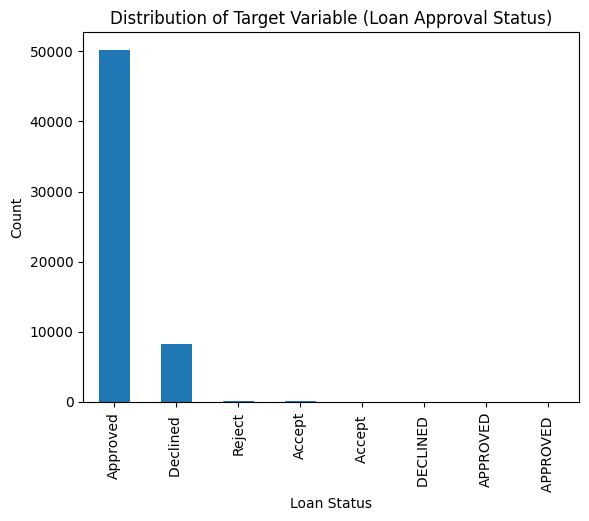

In [71]:
df['loan_approval_status'].value_counts().plot(kind='bar')
plt.title('Distribution of Target Variable (Loan Approval Status)')
plt.xlabel('Loan Status'), plt.ylabel('Count')
plt.show()

In [72]:
df.head()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
0,21.0,M,Unknown,12000,OWN,0,EDUCATION,15000,6.99,0.12,N,4,Approved
1,21.0,M,Unknown,13200,OWN,2,EDUCATION,25000,16.77,0.19,Y,3,Approved
2,23.0,M,Unknown,9600,RENT,5,MEDICAL,30000,12.42,0.31,N,3,Approved
3,40.0,M,Unknown,182004,RENT,3,EDUCATION,35000,8.00,0.19,N,11,Approved
4,40.0,M,Unknown,90000,MORTGAGE,3,HOMEIMPROVEMENT,35000,12.42,0.39,N,14,Approved


In [73]:
df.tail()

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
58640,32,NaN,Unknown,1200000,MORTGAGE,16,DEBTCONSOLIDATION,16000,6.92,0.13,N,5,Approved
58641,32,NaN,Unknown,1200000,RENT,2,PERSONAL,10000,7.51,0.01,N,9,Approved
58642,22,NaN,Unknown,1900000,MORTGAGE,6,EDUCATION,1500,15.62,0.00,Y,3,Approved
58643,25,NaN,Unknown,1839784,RENT,0,VENTURE,8000,8.00,0.04,N,3,Approved
58644,29,NaN,Unknown,1824000,MORTGAGE,8,DEBTCONSOLIDATION,6000,13.99,0.03,N,6,Approved


In [74]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,58639.0,104.0,22.0,5903.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,221,2,M,126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education_Qualifications,58645,6,Unknown,58303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
income,58645.0,NaN,NaN,NaN,64046.172871,37931.106978,4200.0,42000.0,58000.0,75600.0,1900000.0
home_ownership,58645,4,RENT,30594,NaN,NaN,NaN,NaN,NaN,NaN,NaN
emplyment_length,58645.0,NaN,NaN,NaN,4.703487,4.004982,0.0,2.0,4.0,7.0,150.0
loan_intent,58645,6,EDUCATION,12271,NaN,NaN,NaN,NaN,NaN,NaN,NaN
loan_amount,58645.0,NaN,NaN,NaN,9217.556518,5563.807384,500.0,5000.0,8000.0,12000.0,35000.0
loan_interest_rate,58634.0,NaN,NaN,NaN,10.685988,3.161955,-11.14,7.88,10.75,12.99,150.0
loan_income_ratio,58645.0,NaN,NaN,NaN,0.159238,0.091692,0.0,0.09,0.14,0.21,0.83


In [75]:
df.describe(include='all')

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639.0,221,58645,5.864500e+04,58645,58645.000000,58645,58645.000000,58634.000000,58645.000000,58640,58645.000000,58644
unique,104.0,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,22.0,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,5903.0,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,6.404617e+04,NaN,4.703487,NaN,9217.556518,10.685988,0.159238,NaN,5.813556,NaN
std,NaN,NaN,NaN,3.793111e+04,NaN,4.004982,NaN,5563.807384,3.161955,0.091692,NaN,4.029196,NaN
min,NaN,NaN,NaN,4.200000e+03,NaN,0.000000,NaN,500.000000,-11.140000,0.000000,NaN,2.000000,NaN
25%,NaN,NaN,NaN,4.200000e+04,NaN,2.000000,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,NaN
50%,NaN,NaN,NaN,5.800000e+04,NaN,4.000000,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,NaN
75%,NaN,NaN,NaN,7.560000e+04,NaN,7.000000,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,NaN


In [76]:
df['age'].value_counts()

,count
age,
22.0,5903
23.0,5334
24.0,4063
25.0,3039
23,2392
...,...
156,1
-30,1
Twenty Seven,1


In [77]:
df['Sex'].value_counts()

,count
Sex,
M,126
F,95


In [78]:
df['Education_Qualifications'].value_counts()

,count
Education_Qualifications,
Unknown,58303
Unknown,204
Higher Education,86
High School,28
Apprenticeship,15
College,9


In [79]:
df['income'].value_counts()
#max(df['income'])
#min(df['income'])

,count
income,
60000,4164
50000,2992
30000,2200
40000,1981
70000,1876
...,...
304800,1
266000,1
109720,1


In [80]:
df['home_ownership'].value_counts()

,count
home_ownership,
RENT,30594
MORTGAGE,24824
OWN,3138
OTHER,89


In [81]:
df['emplyment_length'].value_counts()

,count
emplyment_length,
0,7586
2,7270
3,6475
5,5838
4,5461
1,5203
6,4902
7,4275
8,3015


In [82]:
df['loan_intent'].value_counts()

,count
loan_intent,
EDUCATION,12271
MEDICAL,10934
PERSONAL,10016
VENTURE,10011
DEBTCONSOLIDATION,9133
HOMEIMPROVEMENT,6280


In [83]:
df['loan_amount'].value_counts()

,count
loan_amount,
10000,7128
5000,5176
6000,4676
12000,4311
15000,3348
...,...
10450,1
32000,1
6775,1


In [84]:
df['loan_interest_rate'].value_counts()

,count
loan_interest_rate,
10.99,2182
7.51,2149
7.88,1758
7.49,1608
13.49,1412
...,...
15.79,1
10.68,1
6.05,1


In [85]:
df['loan_income_ratio'].value_counts()

,count
loan_income_ratio,
0.100,3248
0.130,3226
0.080,2834
0.170,2795
0.070,2725
...,...
0.830,1
0.540,1
0.630,1


In [86]:
df['payment_default_on_file'].value_counts()

,count
payment_default_on_file,
N,49933
Y,8696
NO,7
YES,4


In [87]:
df['credit_history_length'].value_counts()

,count
credit_history_length,
3,10708
2,10657
4,10566
9,3499
8,3477
7,3392
6,3391
10,3364
5,3345


In [88]:
df['loan_approval_status'].value_counts()

,count
loan_approval_status,
Approved,50210
Declined,8268
Reject,78
Accept,58
Accept,21
DECLINED,4
APPROVED,3
APPROVED,2


In [89]:
df.shape

(58645, 13)

In [90]:
df.dtypes
#df.describe()

,0
age,object
Sex,object
Education_Qualifications,object
income,int64
home_ownership,object
emplyment_length,int64
loan_intent,object
loan_amount,int64
loan_interest_rate,float64
loan_income_ratio,float64


In [91]:
# Variable age before cleaning
#df['age'].describe()
#df['age'].min(), df['age'].max()
df['age'].value_counts()
df.describe(include='all')

,age,Sex,Education_Qualifications,income,home_ownership,emplyment_length,loan_intent,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58639.0,221,58645,5.864500e+04,58645,58645.000000,58645,58645.000000,58634.000000,58645.000000,58640,58645.000000,58644
unique,104.0,2,6,NaN,4,NaN,6,NaN,NaN,NaN,4,NaN,8
top,22.0,M,Unknown,NaN,RENT,NaN,EDUCATION,NaN,NaN,NaN,N,NaN,Approved
freq,5903.0,126,58303,NaN,30594,NaN,12271,NaN,NaN,NaN,49933,NaN,50210
mean,NaN,NaN,NaN,6.404617e+04,NaN,4.703487,NaN,9217.556518,10.685988,0.159238,NaN,5.813556,NaN
std,NaN,NaN,NaN,3.793111e+04,NaN,4.004982,NaN,5563.807384,3.161955,0.091692,NaN,4.029196,NaN
min,NaN,NaN,NaN,4.200000e+03,NaN,0.000000,NaN,500.000000,-11.140000,0.000000,NaN,2.000000,NaN
25%,NaN,NaN,NaN,4.200000e+04,NaN,2.000000,NaN,5000.000000,7.880000,0.090000,NaN,3.000000,NaN
50%,NaN,NaN,NaN,5.800000e+04,NaN,4.000000,NaN,8000.000000,10.750000,0.140000,NaN,4.000000,NaN
75%,NaN,NaN,NaN,7.560000e+04,NaN,7.000000,NaN,12000.000000,12.990000,0.210000,NaN,8.000000,NaN


In [92]:
# Converting valid values to float and invalid values to NaN
df['age'] = pd.to_numeric(df['age'], errors='coerce')

# Setting a range to find all unrealistic numbers (such as -30 and 156) and changing them to NaN
df.loc[(df['age']<18) | (df['age']>95),'age'] = None

# Drop NaN values
df = df.dropna(subset=['age'])

# Variable age after cleaning.
df['age'].describe(include='all').round(2)

#df['age'].isna().sum()

,age
count,58633.00
mean,27.55
std,6.02
min,20.00
25%,23.00
50%,26.00
75%,30.00
max,84.00


In [93]:
df['age'].dtypes

dtype('float64')

In [94]:
# Variable Sex before cleaning
df['Sex'].describe()

,Sex
count,221
unique,2
top,M
freq,126


In [95]:
# Variable Sex after cleaning (drop column)
df=df.drop(columns=['Sex'], axis =1)
df.columns

Index(['age', 'Education_Qualifications', 'income', 'home_ownership',
       'emplyment_length', 'loan_intent', 'loan_amount', 'loan_interest_rate',
       'loan_income_ratio', 'payment_default_on_file', 'credit_history_length',
       'loan_approval_status'],
      dtype='object')

In [96]:
# Variable Education_Qualifications before cleaning
df['Education_Qualifications'].describe()

,Education_Qualifications
count,58633
unique,6
top,Unknown
freq,58291


In [97]:
# Variable Education_Qualifications after cleaning (drop column)
df=df.drop(columns=['Education_Qualifications'], axis =1)
df.columns

Index(['age', 'income', 'home_ownership', 'emplyment_length', 'loan_intent',
       'loan_amount', 'loan_interest_rate', 'loan_income_ratio',
       'payment_default_on_file', 'credit_history_length',
       'loan_approval_status'],
      dtype='object')

In [98]:
# Variable home_ownership before cleaning
df.filter(like='home_ownership')

,home_ownership
0,OWN
1,OWN
2,RENT
3,RENT
4,MORTGAGE
...,...
58640,MORTGAGE
58641,RENT
58642,MORTGAGE
58643,RENT


In [99]:
# Variable home_ownership after cleaning (one-hot encoding)
df = pd.get_dummies(df, columns=['home_ownership'])

df.filter(like='home_ownership')


,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,False,False,True,False
1,False,False,True,False
2,False,False,False,True
3,False,False,False,True
4,True,False,False,False
...,...,...,...,...
58640,True,False,False,False
58641,False,False,False,True
58642,True,False,False,False
58643,False,False,False,True


In [100]:
# Variable emplyment_length before cleaning
df['emplyment_length'].value_counts().sort_index().tail(10)
df['emplyment_length'].describe().round(2)

,emplyment_length
count,58633.0
mean,4.7
std,4.0
min,0.0
25%,2.0
50%,4.0
75%,7.0
max,150.0


In [101]:
# Variable emplyment_length after cleaning (setting all values less than 0 and above 75 to NaN, and then removing them)

df.loc[(df['emplyment_length']<0) | (df['emplyment_length']>75), 'emplyment_length'] = None

df = df.dropna(subset=['emplyment_length'])

df['emplyment_length'].describe().round(2)

#df['emplyment_length'].isna().sum()

,emplyment_length
count,58630.0
mean,4.7
std,3.9
min,0.0
25%,2.0
50%,4.0
75%,7.0
max,41.0


In [102]:
# Variable loan_intent before cleaning
df.filter(like='loan_intent')

,loan_intent
0,EDUCATION
1,EDUCATION
2,MEDICAL
3,EDUCATION
4,HOMEIMPROVEMENT
...,...
58640,DEBTCONSOLIDATION
58641,PERSONAL
58642,EDUCATION
58643,VENTURE


In [103]:
# Variable loan_intent after cleaning (one-hot encoding)
df = pd.get_dummies(df, columns=['loan_intent'])

df.filter(like='loan_intent')

,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,False,True,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,True,False,False
3,False,True,False,False,False,False
4,False,False,True,False,False,False
...,...,...,...,...,...,...
58640,True,False,False,False,False,False
58641,False,False,False,False,True,False
58642,False,True,False,False,False,False
58643,False,False,False,False,False,True


In [104]:
# Variable loan_interest_rate before cleaning
df['loan_interest_rate'].describe().round(2)
df['loan_interest_rate'].isna().sum()

np.int64(11)

In [105]:
# Variable loan_interest_rate after cleaning (setting all values less than 0 and above 50 to NaN, and then removing them)
df.loc[(df['loan_interest_rate']<0) | (df['loan_interest_rate']>50), 'loan_interest_rate'] = None

df = df.dropna(subset=['loan_interest_rate'])

df['loan_interest_rate'].describe().round(2)
df['loan_interest_rate'].isna().sum()

np.int64(0)

In [106]:
# Variable payment_default_on_file before cleaning
df['payment_default_on_file'].value_counts(dropna=False)
df['payment_default_on_file'].describe()
df.filter(like='payment_default_on_file')

,payment_default_on_file
0,N
1,Y
2,N
3,N
4,N
...,...
58640,N
58641,N
58642,Y
58643,N


In [107]:
# Variable payment_default_on_file after cleaning
#(standardising other values to either Y, or N)
df['payment_default_on_file']=df['payment_default_on_file'].replace({'YES': 'Y','NO': 'N'})

# Remove NaN values
df = df.dropna(subset=['payment_default_on_file'])

# Encode categorical values so they are binary.
df['payment_default_on_file']=df['payment_default_on_file'].map({'Y':1, 'N':0})

df.filter(like='payment_default_on_file')

df['payment_default_on_file'].value_counts(dropna=False)

#df['payment_default_on_file'].isna().sum()

,count
payment_default_on_file,
0,49911
1,8696


In [108]:
# Variable loan_approval_status before cleaning
df['loan_approval_status'].value_counts(dropna=False)

,count
loan_approval_status,
Approved,50182
Declined,8259
Reject,77
Accept,58
Accept,21
DECLINED,4
APPROVED,3
APPROVED,2
NaN,1


In [109]:
# Variable loan_approval_status after cleaning

# Make all values lowercase and removing any unwanted characters from the before and after the word.
df['loan_approval_status']=df['loan_approval_status'].str.lower().str.strip()

# Standardising other values to either Approved, or Declined
df['loan_approval_status']=df['loan_approval_status'].replace({'accept': 'Approved','approved': 'Approved','reject': 'Declined','declined': 'Declined'})

# Remove the instance where there is no value sinces it is a part of our target variable and we dont want to risk bias by implementing the mode.
df=df.dropna(subset=['loan_approval_status'])

# Encode categorical values so they are binary.
df['loan_approval_status']=df['loan_approval_status'].map({'Approved': 0,'Declined': 1})

df['loan_approval_status'].value_counts(dropna=False)

,count
loan_approval_status,
0,50266
1,8340


In [110]:
# All numerial values before scaling.
df.head()
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.0,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,27.55,64049.85,4.7,9216.85,10.68,0.16,0.15,5.81,0.14
std,6.02,37933.79,3.9,5563.57,3.04,0.09,0.36,4.03,0.35
min,20.00,4200.00,0.0,500.00,5.42,0.00,0.00,2.00,0.00
25%,23.00,42000.00,2.0,5000.00,7.88,0.09,0.00,3.00,0.00
50%,26.00,58000.00,4.0,8000.00,10.75,0.14,0.00,4.00,0.00
75%,30.00,75600.00,7.0,12000.00,12.99,0.21,0.00,8.00,0.00
max,84.00,1900000.00,41.0,35000.00,35.80,0.83,1.00,30.00,1.00


In [111]:
# All numerical values after scaling.
scaler = StandardScaler()

numerical_features = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

df[numerical_features]= scaler.fit_transform(df[numerical_features])

df.head()
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.15,0.00,0.14
std,1.00,1.00,1.00,1.00,1.00,1.00,0.36,1.00,0.35
min,-1.25,-1.58,-1.20,-1.57,-1.73,-1.74,0.00,-0.95,0.00
25%,-0.76,-0.58,-0.69,-0.76,-0.92,-0.75,0.00,-0.70,0.00
50%,-0.26,-0.16,-0.18,-0.22,0.02,-0.21,0.00,-0.45,0.00
75%,0.41,0.30,0.59,0.50,0.76,0.55,0.00,0.54,0.00
max,9.38,48.40,9.31,4.63,8.27,7.32,1.00,6.00,1.00


In [112]:
df.shape
df.describe().round(2)

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status
count,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00,58606.00
mean,0.00,0.00,0.00,0.00,-0.00,-0.00,0.15,0.00,0.14
std,1.00,1.00,1.00,1.00,1.00,1.00,0.36,1.00,0.35
min,-1.25,-1.58,-1.20,-1.57,-1.73,-1.74,0.00,-0.95,0.00
25%,-0.76,-0.58,-0.69,-0.76,-0.92,-0.75,0.00,-0.70,0.00
50%,-0.26,-0.16,-0.18,-0.22,0.02,-0.21,0.00,-0.45,0.00
75%,0.41,0.30,0.59,0.50,0.76,0.55,0.00,0.54,0.00
max,9.38,48.40,9.31,4.63,8.27,7.32,1.00,6.00,1.00


In [117]:
#Saving the classification dataset under the name loan_approval_status_data_cleaned
OUT_PATH = Path("data/processed/loan_approval_status_data_cleaned.csv")
df.to_csv(OUT_PATH, index=False)

In [118]:
df_loan_status = pd.read_csv(Path("data/processed/loan_approval_status_data_cleaned.csv"))
df_loan_status.head()

,age,income,emplyment_length,loan_amount,loan_interest_rate,loan_income_ratio,payment_default_on_file,credit_history_length,loan_approval_status,home_ownership_MORTGAGE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE
0,-1.087902,-1.372135,-1.204753,1.039476,-1.214567,-0.427710,0,-0.450068,0,False,False,True,False,False,True,False,False,False,False
1,-1.087902,-1.340501,-0.691768,2.836900,2.006486,0.335779,1,-0.698231,0,False,False,True,False,False,True,False,False,False,False
2,-0.755674,-1.435404,0.077710,3.735611,0.573809,1.644617,0,-0.698231,0,False,False,False,True,False,False,False,True,False,False
3,2.068266,3.109501,-0.435275,4.634323,-0.881922,0.335779,0,1.287069,0,False,False,False,True,False,True,False,False,False,False
4,2.068266,0.684097,-0.435275,4.634323,0.573809,2.517176,0,2.031557,0,True,False,False,False,False,False,True,False,False,False


## 4. Model Development

The cleaned dataset was split into training and testing sets using an 80:20 ratio. Stratified sampling was applied to preserve class distribution across both sets.

Three classification models were trained and compared:

- Naïve Bayes  
- Logistic Regression  
- Random Forest  

Model performance was evaluated using precision and recall, prioritising accurate identification of high-risk (declined) loan applications.


In [ ]:
 # The inputs are all the features on the x-axis except for the target variable
X = df_loan_status.drop(['loan_approval_status'], axis=1)

# The target variable is assigned to y
y = df_loan_status['loan_approval_status']

# Split the dataset in 80% Training and 20% Test with class stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30, stratify=y)

## instantiate the model using default parameters
# Building the models
NB_clf = GaussianNB()
LR_clf = LogisticRegression(random_state=30)
RF_clf = RandomForestClassifier(random_state=30)

# Train the models
NB_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)
RF_clf.fit(X_train, y_train)

# Run the model and store the predicted values
NB_pred = NB_clf.predict(X_test)
LR_pred = LR_clf.predict(X_test)
RF_pred = RF_clf.predict(X_test)

# View the predicted values
NB_pred
LR_pred
RF_pred

In [ ]:
# Features used for the model
for features in X.columns:
    print(features)

# Shape of datasets
print('\nShape of datasets:')
print('Whole Data shape',df_loan_status.shape)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

## 5. Model Evaluation

Model performance was evaluated using business-relevant classification metrics.

Due to class imbalance in the dataset, accuracy alone is not a reliable performance indicator. Instead, emphasis was placed on:

- **Recall (Declined class)** – ensuring high-risk applicants are correctly identified.
- **Precision (Declined class)** – ensuring rejected predictions are accurate.
- Confusion matrices – to visualise true positives, false positives, false negatives, and true negatives.

The Random Forest model demonstrated the strongest balance between precision and recall for identifying high-risk applicants.


In [ ]:
# To plot the confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

# Construct the confusion matrix cm
NB_cm = confusion_matrix(y_test, NB_pred, labels=NB_clf.classes_)
LR_cm = confusion_matrix(y_test, LR_pred, labels=LR_clf.classes_)
RF_cm = confusion_matrix(y_test, RF_pred, labels=RF_clf.classes_)

# Create a display to plot the confusion matrix
NB_disp = ConfusionMatrixDisplay(NB_cm,display_labels=NB_clf.classes_)
LR_disp = ConfusionMatrixDisplay(LR_cm,display_labels=LR_clf.classes_)
RF_disp = ConfusionMatrixDisplay(RF_cm,display_labels=RF_clf.classes_)

# Plot the confusion matrix
NB_disp.plot()
LR_disp.plot()
RF_disp.plot()

In [ ]:
from sklearn.metrics import classification_report

# Produce the Naive Bayes classification report for test
print("Naive Bayes report \n", classification_report(y_test, NB_pred))
# Plot the ROC curve for Naive Bayes clf
NB_clf_Roc = RocCurveDisplay.from_estimator(NB_clf, X_test, y_test)

# Produce the Logistic Regression classification report for test
print("Logistic Regression report \n", classification_report(y_test, LR_pred))
# Plot the ROC curve for Logistic Regression clf
LR_clf_Roc = RocCurveDisplay.from_estimator(LR_clf, X_test, y_test)

# Produce the Random Forest classification report for test
print("Random Forest report \n", classification_report(y_test, RF_pred))
# Plot the ROC curve for Random Forest clf
RF_clf_Roc = RocCurveDisplay.from_estimator(RF_clf, X_test, y_test)

In [ ]:
# Produce the Random Forest classification report for train
RF_train_pred = RF_clf.predict(X_train)
print("Random Forest report using train data\n", classification_report(y_train, RF_train_pred))

# Produce the Random Forest classification report for test
print("Random Forest report using test data \n", classification_report(y_test, RF_pred))

## 6. Hyperparameter Tuning

To improve model performance, hyperparameter optimisation was conducted using GridSearchCV with 5-fold cross-validation.

The Random Forest model was selected for tuning due to its strong baseline performance.

Key parameters such as the number of estimators, maximum depth, minimum samples split, and maximum features were evaluated to enhance generalisation and improve recall for high-risk (declined) loan applications.

In [ ]:
#create a new random forest classifier
rf = RandomForestClassifier(random_state=30)

#create a dictionary of all values we want to test for n_estimators
params_rf = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'max_features': ['sqrt', 'log2']}

#use gridsearch to test all values
rf_gs = GridSearchCV(rf, params_rf, cv=5, n_jobs = -1)

# fit model to training data
rf_gs.fit(X_train, y_train)

# save best model
rf_best = rf_gs.best_estimator_

# check best values
print(rf_gs.best_params_)

# make prediction on the test data
y_pred_rf = rf_best.predict(X_test)

In [ ]:
# Before tuning hyperparameters values
params_before_tuning = {'max_depth': RF_clf.max_depth, 'max_features': RF_clf.max_features, 'min_samples_split': RF_clf.min_samples_split, 'n_estimators': RF_clf.n_estimators}
print(params_before_tuning)

In [ ]:
print("confusion_matrix for RF after tuning")
best_rf_cm=confusion_matrix(y_test,y_pred_rf)
disp=ConfusionMatrixDisplay(confusion_matrix=best_rf_cm,display_labels = rf_best.classes_)
disp.plot()

In [ ]:
print("Classification report for RF after tuning")
print(classification_report(y_test,y_pred_rf))

## 7. Final Model Performance

After hyperparameter tuning, the Random Forest model achieved strong performance on the test dataset while maintaining balanced precision and recall for the declined class.

Although training performance was near-perfect, the slight performance gap between training and testing results indicates mild overfitting — a common characteristic of ensemble models.

Overall, the tuned Random Forest model demonstrates strong generalisation ability and provides a reliable framework for identifying high-risk loan applicants in real-world deployment scenarios.


## 8. Ethical Considerations

Automated loan approval systems must be deployed responsibly.

Potential risks include:

- Historical bias embedded in training data
- Disproportionate rejection of specific demographic groups
- Over-reliance on automated decision systems without human oversight

Machine learning models should support decision-making rather than replace human judgement in high-stakes financial contexts.


# Part B – Loan Amount Prediction (Regression)

## 1. Business Objective (Regression)

In addition to predicting loan approval status, this section aims to predict the maximum approved loan amount using regression techniques.

Accurate loan amount prediction can assist financial institutions in:
- Risk-adjusted lending decisions
- Capital allocation planning
- Personalised loan offers


## 2. Dataset Preparation

The original dataset was reloaded to construct a regression modelling dataset.

The target variable for this section is the maximum loan amount approved.


In [ ]:
pd.options.display.float_format = '{:.2f}'.format

# Creating the regression dataset using the original csv file with all the data
df2 = Path("../data/processed/loan_approval_status_data_cleaned.csv")

# Check values in Credit Application Acceptance
df2['Credit_Application_Acceptance'].value_counts(dropna=False)

## 3. Data Preprocessing (Regression)

Data cleaning and transformation steps were applied to prepare the dataset for regression modelling.

Categorical variables were encoded and missing values were handled to ensure compatibility with regression algorithms.


In [ ]:
# Remove the instance where there is no value from Credit Application Acceptance
df2=df2.dropna(subset=['Credit_Application_Acceptance'])

# Check NaN value has been dropped successfully
df2['Credit_Application_Acceptance'].value_counts(dropna=False)

# Remove all applicants who were declined a loan.
approved_loan_applicants =  df2[(df2.Credit_Application_Acceptance < 1)]

# Checking basic stats to see if all applicants who were declined a loan have been removed successfully.
approved_loan_applicants.describe().transpose()

# Drop the Credit Application Acceptance and loan_approval_status variable from the data frame
approved_loan_applicants.drop('loan_approval_status',axis=1, inplace=True)
approved_loan_applicants.drop('Credit_Application_Acceptance',axis=1, inplace=True)
#approved_loan_applicants.head()

#Dropping features we don't need
approved_loan_applicants.drop(['id'], axis=1, inplace=True)

# Variable age cleaning
approved_loan_applicants['age'] = pd.to_numeric(approved_loan_applicants['age'], errors='coerce')
approved_loan_applicants.loc[(approved_loan_applicants['age']<18) | (approved_loan_applicants['age']>95),'age'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['age'])

# Variable Sex cleaning
approved_loan_applicants=approved_loan_applicants.drop(columns=['Sex'], axis =1)

# Variable Education_Qualifications cleaning
approved_loan_applicants=approved_loan_applicants.drop(columns=['Education_Qualifications'], axis =1)

# Variable home_ownership cleaning (one-hot encoding)
approved_loan_applicants = pd.get_dummies(approved_loan_applicants, columns=['home_ownership'])

# Variable emplyment_length cleaning (setting all values less than 0 and above 75 to NaN, and then removing them)
approved_loan_applicants.loc[(approved_loan_applicants['emplyment_length']<0) | (approved_loan_applicants['emplyment_length']>75), 'emplyment_length'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['emplyment_length'])

# Variable loan_intent cleaning (one-hot encoding)
approved_loan_applicants = pd.get_dummies(approved_loan_applicants, columns=['loan_intent'])

# Variable loan_interest_rate cleaning (setting all values less than 0 and above 50 to NaN, and then removing them)
approved_loan_applicants.loc[(approved_loan_applicants['loan_interest_rate']<0) | (approved_loan_applicants['loan_interest_rate']>50), 'loan_interest_rate'] = None
approved_loan_applicants = approved_loan_applicants.dropna(subset=['loan_interest_rate'])

# Variable payment_default_on_file cleaning - standardising, removing NaN values and encoding
approved_loan_applicants['payment_default_on_file']=approved_loan_applicants['payment_default_on_file'].replace({'YES': 'Y','NO': 'N'})
approved_loan_applicants = approved_loan_applicants.dropna(subset=['payment_default_on_file'])
approved_loan_applicants['payment_default_on_file']=approved_loan_applicants['payment_default_on_file'].map({'Y':1, 'N':0})

# Target variable max_allowed_loan cleaning
approved_loan_applicants = approved_loan_applicants[approved_loan_applicants['max_allowed_loan'] > 0]
approved_loan_applicants = approved_loan_applicants[approved_loan_applicants['max_allowed_loan'] < 10000000]

In [ ]:
approved_loan_applicants.head(50)
approved_loan_applicants.describe().round(2)

In [ ]:
# Export the cleaned regression data
save_path = Path("../data/processed/loan_max_amount_data.csv")
save_path.parent.mkdir(parents=True, exist_ok=True)
approved_loan_applicants.to_csv(save_path, index=False)

In [ ]:
df_loan_max = save_path
df_loan_max.head()

In [ ]:
print ('Dimensions of Regression Dataset', df_loan_max.shape)

# Features used for the model
for feature in df_loan_max.columns:
    print(feature)

In [ ]:
import matplotlib.pyplot as plt

# All numerical features
numeric_features = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length', 'max_allowed_loan']


for features in numeric_features:
    df_loan_max[features].hist(edgecolor='black')
    plt.title(f'Distribution of {features}')
    plt.xlabel(features), plt.ylabel('Frequency')
    plt.grid(False)
    plt.show()


# All encoded categorical features
encoded_features = ['payment_default_on_file', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE']

for features in encoded_features:
    df_loan_max[features].value_counts().plot(kind='bar', edgecolor='black'),
    plt.title(f'Distribution of {features}'),
    plt.ylabel('Count')
    plt.show()

In [ ]:
df_loan_max.describe()

### 4. Model Development (Regression)

This section implements regression models to predict the maximum approved loan amount.

Two modelling approaches are evaluated:

• Model 1 – Decision Tree Regressor using numerical features only  
• Model 2 – Decision Tree Regressor using the full feature set (including encoded categorical variables)

The dataset is split into 80% training and 20% testing data.

Model performance is evaluated using regression metrics:
- R² Score
- Mean Absolute Error (MAE)
- Mean Squared Error (MSE)

This comparison allows assessment of whether additional categorical information improves predictive performance.


In [ ]:
numeric_feature = ['age', 'income', 'emplyment_length', 'loan_amount', 'loan_interest_rate', 'loan_income_ratio', 'credit_history_length']

# DT Model 1
X1 = df_loan_max[numeric_feature]
# DT Model 2
X2 = df_loan_max.drop(['max_allowed_loan'], axis=1)
# Target variable for both models
y = df_loan_max['max_allowed_loan']

# Model 1 - Split the dataset in 80% Training and 20% Test
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=30)

# Model 2 - Split the dataset in 80% Training and 20% Test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=30)

# Building Model 1
DT1 = DecisionTreeRegressor(random_state=30)
DT1.fit (X1_train, y1_train)

# To make predictions on the test set
y1_pred_test = DT1.predict(X1_test)

# Building Model 2
DT2 = DecisionTreeRegressor(random_state=30)
DT2.fit (X2_train, y2_train)

# To make predictions on the test set
y2_pred_test = DT2.predict(X2_test)

### 5. Train-Test Split Strategy

The regression dataset was divided into 80% training data and 20% testing data.

The training set is used to fit the decision tree models, while the test set is used to evaluate predictive performance on unseen data.

This approach helps reduce overfitting and provides a more realistic assessment of how the model would perform in real-world loan approval scenarios.


In [ ]:
# DT Model 1s dimensions
print("Model 1 - Numeric features only")
print("X1_train shape:", X1_train.shape)
print("X1_test shape:", X1_test.shape)
print("y_train shape:", y1_train.shape)
print("y_test shape:", y1_test.shape)

# DT Model 1s features
print("\nModel 1 features:")
for features in X1.columns:
  print(features)

In [ ]:
# DT Model 2s dimensions
print("Model 2 - All retained features")
print("X2_train shape:", X2_train.shape)
print("X2_test shape:", X2_test.shape)
print("y_train shape:", y2_train.shape)
print("y_test shape:", y2_test.shape)

# DT Model 2s features
print("\nModel 2 features:")
for features in X2.columns:
  print(features)

### 6. Feature Importance

To understand which variables most influence maximum approved loan amount, feature importance from the decision tree model was examined.

Income, loan amount requested, and credit history length appear to be the strongest predictors.

This aligns with financial intuition, as lenders prioritise repayment capacity and borrowing history when determining maximum lending thresholds.


In [ ]:
print ('Metrics for Model 1')
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred_test))
print('R2:', metrics.r2_score(y1_test, y1_pred_test))

print('\nMetrics for Model 2')
print('Mean Squared Error:', metrics.mean_squared_error(y2_test, y2_pred_test))
print('Mean Absolute Error:', metrics.mean_absolute_error(y2_test, y2_pred_test))
print('R2:', metrics.r2_score(y2_test, y2_pred_test))

## 7. Model Comparison

Two regression models were evaluated:

• Model 1 – Numerical features only  
• Model 2 – Full feature set (including encoded categorical variables)

Model 1 achieved:
- R² ≈ 0.969  
- MAE ≈ £1,210  

Model 2 achieved:
- R² ≈ 0.971  
- MAE ≈ £1,257  

Both models demonstrate strong predictive performance.

The marginal improvement in R² suggests that numerical financial indicators (income, loan amount, credit history length) capture most of the predictive signal.

Given the minimal performance gain, the simpler feature set may be preferable for efficiency and interpretability.


In [ ]:
# Limit the tree growth to 4 levels
DT1_pruned_regressor = DecisionTreeRegressor(max_depth=4, random_state=30)
DT1_pruned_regressor.fit(X1_train, y1_train)

# To make predictions on the test set
y1_pred_pruned = DT1_pruned_regressor.predict(X1_test)

# Plot the regression DT
pruned_Tree_model = plt.figure(figsize=(20,10))
pruned_Tree_model_Graph = tree.plot_tree(DT1_pruned_regressor, feature_names=list(X1_train.columns), filled=True)

# To save the DT graph as a png image
pruned_Tree_model.savefig("pruned_reg_decision_tree.png")

# Calculating the regression metrics for the pruned regression decision Tree
print ('Metrics for Pruned Regression Decision Tree')
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred_pruned))
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred_pruned))
print('R2:', metrics.r2_score(y1_test, y1_pred_pruned))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred_pruned)))

## 8. Effect of Tree Pruning

Restricting the tree depth to four levels reduced model complexity and improved interpretability.

However, performance declined significantly (R² ≈ 0.86), indicating that deeper splits were capturing important interaction effects.

This highlights the trade-off between model simplicity and predictive power. In regulated financial environments, simpler models may be preferred for transparency, but at the cost of reduced accuracy.


In [ ]:
# Create a new DataFrame from scratch to predict Maximum Loan Amount
data = []
data.append( {"age":56,
              "income":57000,
              "emplyment_length":15,
              "loan_amount":25700,
              "loan_interest_rate":23,
              "loan_income_ratio":0.10,
              "credit_history_length":35,
              } )
df3 = pd.DataFrame(data)

# Add a new column to `df3` with the predicted prices:
df3["Predicted Max Loan Amount"] = DT1_pruned_regressor.predict(df3)
df3.head()

### 9. New Applicant Prediction

For a 56-year-old applicant with:
- Income: £57,000  
- Employment length: 15 years  
- Loan amount requested: £25,700  
- Interest rate: 23%  
- Credit history length: 35 years  

The pruned model predicts a maximum approved loan amount of approximately **£92,901**.

This demonstrates how the regression model can support lending decision simulations and scenario analysis in real-world banking environments.


## 10. Limitations

Although the Decision Tree model performs well, several limitations exist:

- Decision trees can overfit complex datasets.
- The model assumes historical approval patterns remain stable over time.
- External macroeconomic factors (e.g., inflation, interest rate shifts) are not incorporated.

Future work could explore ensemble methods such as Random Forest or Gradient Boosting to improve robustness.


## 11. Conclusion – Regression Analysis

The Decision Tree Regressor demonstrates strong predictive performance for estimating maximum approved loan amounts.

Key findings:
- Numerical financial indicators drive most predictive power.
- Categorical variables provide limited additional improvement.
- Deep trees increase accuracy but reduce interpretability.
- Pruned trees simplify structure at the cost of performance.

Overall, regression modelling provides valuable decision support for capital allocation and personalised lending strategies.
